In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from utils2 import seasonal_plotter
import os

# ******************************************************************************************
# ************************************   Part 1   ******************************************
# ******************************************************************************************

print(os.getcwd())

/root/forecasting/exploration/py


In [3]:

temps = pd.read_csv('../../data/vic_elec.csv', parse_dates=[['Date', 'Time']])
elec_demand = (
    temps
    .set_index('Date_Time')
    .drop(['Index', 'Date.1', 'Temperature', 'Holiday'], axis=1)
    .resample('1H')
    .sum()
)
elec_demand.head()

,Demand
Date_Time,
2012-01-01 00:00:00,8646.190700
2012-01-01 01:00:00,7926.529376
2012-01-01 02:00:00,7901.826990
2012-01-01 03:00:00,7255.721350
2012-01-01 04:00:00,6792.503352


In [5]:
df = elec_demand.copy()

In [7]:
df.index.names = ['Date']
df.head()

,Demand
Date,
2012-01-01 00:00:00,8646.190700
2012-01-01 01:00:00,7926.529376
2012-01-01 02:00:00,7901.826990
2012-01-01 03:00:00,7255.721350
2012-01-01 04:00:00,6792.503352


In [8]:
df.reset_index(inplace=True)
df.head()

,Date,Demand
0,2012-01-01 00:00:00,8646.190700
1,2012-01-01 01:00:00,7926.529376
2,2012-01-01 02:00:00,7901.826990
3,2012-01-01 03:00:00,7255.721350
4,2012-01-01 04:00:00,6792.503352


In [10]:
df['period_col'] = [d.strftime('%Y-%m-%d') for d in df.Date]  # day
df['period_child_col'] = [d.strftime('%H') for d in df.Date]  # hour
period_child_col = 'Hour'
periods = df['period_col'].unique()
periods_count = len(periods)
# df.to_csv('intermediate.csv')
df.head()

,Date,Demand,period_col,period_child_col
0,2012-01-01 00:00:00,8646.190700,2012-01-01,00
1,2012-01-01 01:00:00,7926.529376,2012-01-01,01
2,2012-01-01 02:00:00,7901.826990,2012-01-01,02
3,2012-01-01 03:00:00,7255.721350,2012-01-01,03
4,2012-01-01 04:00:00,6792.503352,2012-01-01,04


KeyboardInterrupt: 

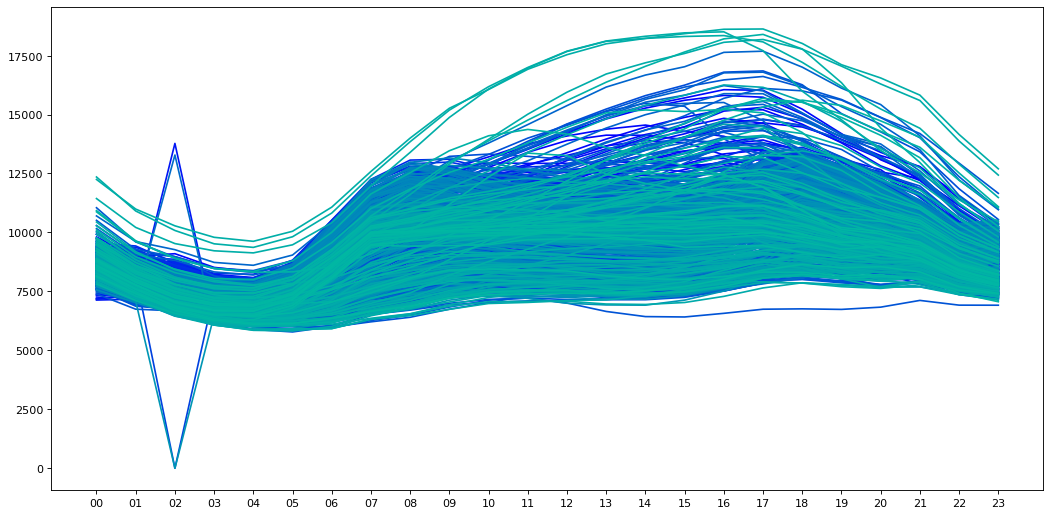

In [34]:
series_name = 'Demand'
def seasonal_plotter_single(ax, counter):

        # get year
        the_period = periods[counter]

        # get monthly data for year
        to_plot = df.query(
            'period_col == @the_period').filter(['period_child_col', series_name])

        # plot line
        ax.plot(to_plot['period_child_col'], to_plot[series_name],
                color=cmap(norm(counter)))

        # # add text at end
        # ax.text(df.loc[df.period_col == periods[1], :].shape[0]-0.95,  # always a constant
        #         # last value of the year
        #         df.loc[df.period_col == periods[counter],
        #                series_name][-1:].values[0],
        #         periods[counter], color=cmap(norm(counter)), fontsize=10)

        # # add text at start
        # ax.text(df.loc[df.period_col == periods[1], :].shape[0]-12.4,
        #         df.loc[df.period_col == periods[counter],
        #                series_name][0:1].values[0],
        #         periods[counter], color=cmap(norm(counter)), fontsize=10)

        return ax

cmap = mpl.cm.winter
norm = mpl.colors.Normalize(vmin=0, vmax=periods_count)
fig, ax = plt.subplots(figsize=(16, 8), dpi=80)

for i in range(1, periods_count-1):
# for i in range(1, 2):
    seasonal_plotter_single(ax, i)

ax.set_title('Title', fontsize=20)
plt.gca().set(xlim=(-0.5, 11.5), ylim=(2, 30), ylabel='y-label', xlabel=period_child_col)
# plt.yticks(fontsize=12, alpha=.7)
plt.show()

Selected period: 2012-01-02
Dataframe to plot:
   period_child_col       Demand
24               00  8531.930426
25               01  7650.256638
26               02  7717.487310
27               03  7091.489620
28               04  6850.548704
Dataframe size: (24, 2)
Selected period: 2012-01-03
Dataframe to plot:
   period_child_col       Demand
48               00  9916.813072
49               01  8898.740852
50               02  8844.998980
51               03  8055.086810
52               04  7760.297342
Dataframe size: (24, 2)
Selected period: 2012-01-04
Dataframe to plot:
   period_child_col       Demand
72               00  9105.821050
73               01  8337.050208
74               02  8447.041402
75               03  7801.744674
76               04  7641.307458
Dataframe size: (24, 2)
Selected period: 2012-01-05
Dataframe to plot:
    period_child_col       Demand
96                00  8089.210196
97                01  7418.003746
98                02  7589.833100
99        

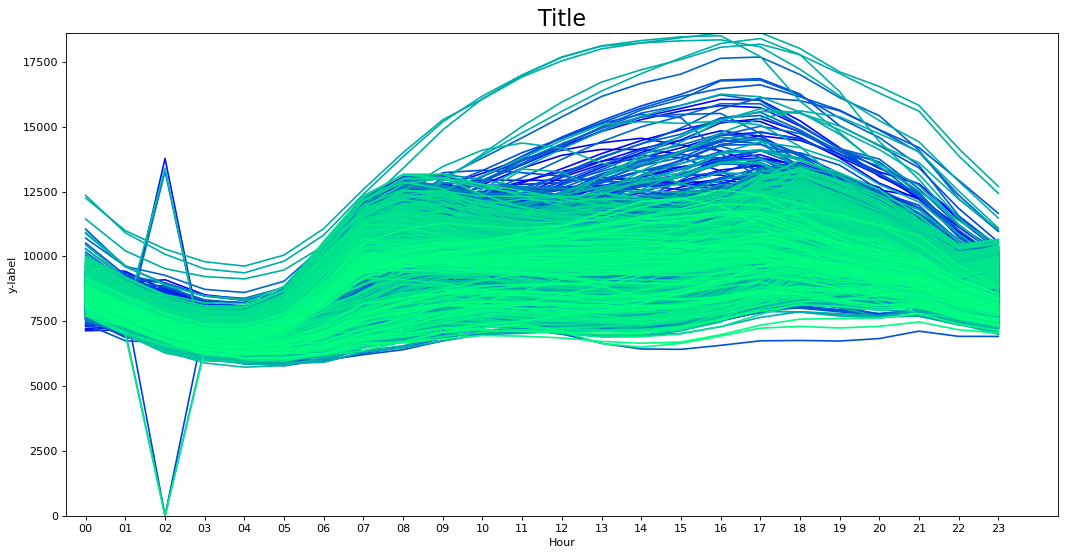

In [31]:
series_name = 'Demand'
is_debug='False'

cmap = mpl.cm.winter
norm = mpl.colors.Normalize(vmin=0, vmax=periods_count)
fig, ax = plt.subplots(figsize=(16, 8), dpi=80)

min_y = df[series_name].min()
max_y = df[series_name].max()

for i in range(1, periods_count-1):
    # get year
    the_period = periods[i]

    if(is_debug): 
        print('Selected period: {}'.format(the_period))

    # get monthly data for year
    to_plot = df.query('period_col == @the_period').filter(['period_child_col', series_name])
    if(is_debug): 
        print('Dataframe to plot:')
        print(to_plot.head())
        print('Dataframe size: {}'.format(to_plot.shape))


    # plot line
    ax.plot(to_plot['period_child_col'], to_plot[series_name], color=cmap(norm(i)))

    # # add text at end
    # ax.text(df.loc[df.period_col == periods[1], :].shape[0]-0.95,  # always a constant
    #         # last value of the year
    #         df.loc[df.period_col == periods[counter],
    #                series_name][-1:].values[0],
    #         periods[counter], color=cmap(norm(counter)), fontsize=10)

    # # add text at start
    # ax.text(df.loc[df.period_col == periods[1], :].shape[0]-12.4,
    #         df.loc[df.period_col == periods[counter],
    #                series_name][0:1].values[0],
    #         periods[counter], color=cmap(norm(counter)), fontsize=10)

ax.set_title('Title', fontsize=20)
plt.gca().set(xlim=(-0.5, 24.5), ylim=(min_y, max_y), ylabel='y-label', xlabel=period_child_col)
# plt.yticks(fontsize=12, alpha=.7)
plt.show()

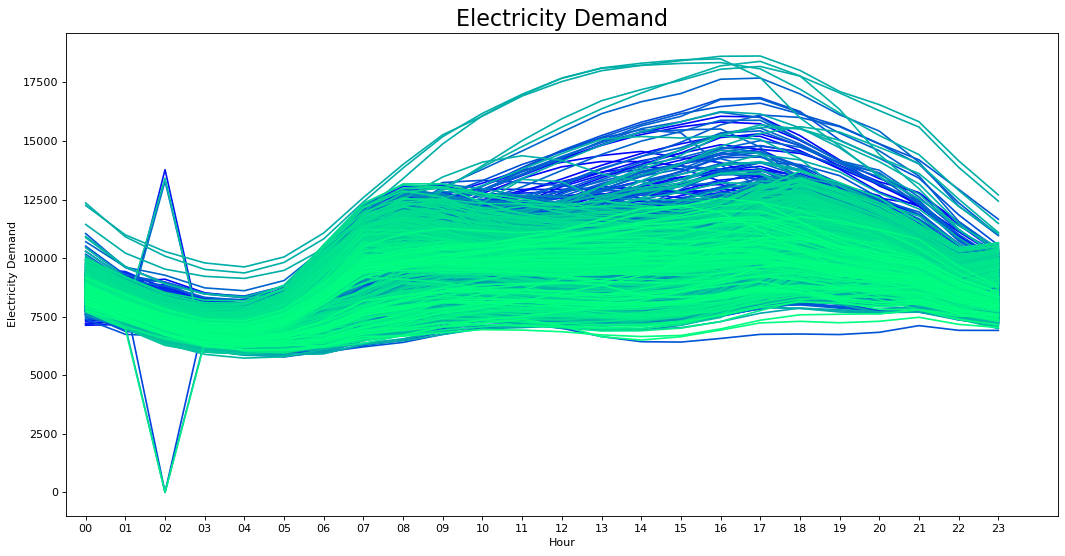

<Figure size 432x288 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from utils2 import seasonal_plotter
import os

# ******************************************************************************************
# ************************************   Part 1   ******************************************
# ******************************************************************************************

# print(os.getcwd())

temps = pd.read_csv('../../data/vic_elec.csv', parse_dates=[['Date', 'Time']])
elec_demand = (
    temps
    # .head(1000)
    .set_index('Date_Time')
    .drop(['Index', 'Date.1', 'Temperature', 'Holiday'], axis=1)
    .resample('1H')
    .sum()
)

# print(elec_demand.head())
seasonal_plotter(elec_demand, 'Demand', period='day', filename='Electricity Demand')